## Final Project Submission

Please fill out:
* Student name: EVANS OJUOK OCHIENG
* Student pace: HYBRID
* Scheduled project review date/time: 
* Instructor name: ANTONNY MUIKO
* Blog post URL:


In [88]:
# import the necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
## DATA CLEANING

##bom.movie_gross

# reading box office csv
movie_gross_path=r"C:\Users\Hp\Desktop\MORINGA PHASE 2\dsc-phase-2-project-v3-1\zippedData\bom.movie_gross.csv.gz"
movie_gross_df = pd.read_csv(movie_gross_path)
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [90]:
# checking for missing values in the dataframe
movie_gross_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [91]:
# Fill null values in the 'studio' column with "Unknown"
movie_gross_df['studio'].fillna('Unknown', inplace=True)

In [92]:
movie_gross_df.isnull().sum()

title                0
studio               0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [93]:
# filling in missing values in domestic gross using median
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(movie_gross_df['domestic_gross'].median())

In [94]:
# Remove commas and convert to numeric for foreign_gross
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(',', '')
# Change the data type to float
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype(float)
# Fill missing foreign_gross values with the median
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(movie_gross_df['foreign_gross'].median())

In [95]:
movie_gross_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

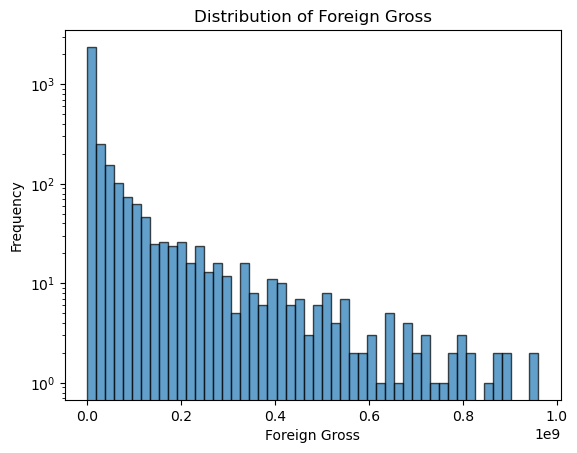

In [96]:
# Plot the distribution of foreign_gross
plt.hist(movie_gross_df['foreign_gross'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Foreign Gross')
plt.xlabel('Foreign Gross')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()



In [97]:
## The Numbers

In [98]:
#loading The Numbers data, head 
tn_movies = pd.read_csv(r'zippedData\tn.movie_budgets.csv.gz')
tn_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [99]:
tn_movies.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [100]:

tn_movies.shape

(5782, 6)

In [101]:
tn_movies.info

<bound method DataFrame.info of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1  

In [102]:
# Convert financial columns to float
tn_movies['domestic_gross'] = tn_movies['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
tn_movies['worldwide_gross'] = tn_movies['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [103]:
tn_movies.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

## imdb 

In [104]:
import zipfile
import os

# Correct file path to the zip file
zip_path = r'C:\Users\Hp\Desktop\MORINGA PHASE 2\dsc-phase-2-project-v3-1\zippedData\im.db.zip'

# Extract to a directory
extract_path = r'C:\Users\Hp\Desktop\MORINGA PHASE 2\dsc-phase-2-project-v3-1\extractedData'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Unzip the folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to {extract_path}")


Files extracted to C:\Users\Hp\Desktop\MORINGA PHASE 2\dsc-phase-2-project-v3-1\extractedData


In [105]:
db_path = r'C:\Users\Hp\Desktop\MORINGA PHASE 2\dsc-phase-2-project-v3-1\extractedData\im.db'

conn = sqlite3.connect(db_path)

query = """
SELECT
    movie_basics.primary_title,
    movie_basics.genres,
    movie_ratings.averagerating,
    movie_ratings.numvotes
FROM movie_basics 
JOIN movie_ratings USING(movie_id)
"""
imdb = pd.read_sql(query, conn)

In [106]:
imdb

,primary_title,genres,averagerating,numvotes
0,Sunghursh,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,"Biography,Drama",7.2,43
2,The Other Side of the Wind,Drama,6.9,4517
3,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...
73851,Diabolik sono io,Documentary,6.2,6
73852,Sokagin Çocuklari,"Drama,Family",8.7,136
73853,Albatross,Documentary,8.5,8
73854,La vida sense la Sara Amat,None,6.6,5


In [107]:
imdb.head()

,primary_title,genres,averagerating,numvotes
0,Sunghursh,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,"Biography,Drama",7.2,43
2,The Other Side of the Wind,Drama,6.9,4517
3,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5,119


In [108]:
imdb["genres"].value_counts()

genres
Drama                        11612
Documentary                  10313
Comedy                        5613
Horror                        2692
Comedy,Drama                  2617
                             ...  
Sport,Thriller                   1
Comedy,Sport,Western             1
Action,Music                     1
Comedy,Sci-Fi,Western            1
Documentary,Family,Sci-Fi        1
Name: count, Length: 923, dtype: int64

In [109]:
imdb.columns

Index(['primary_title', 'genres', 'averagerating', 'numvotes'], dtype='object')

In [110]:
imdb["averagerating"].describe()

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

In [111]:
# if the mean ratings is 6.33 then we can confidently say that ratings above 6.33 are above average

##DATA ANALYSIS

In [112]:
imdb.columns

Index(['primary_title', 'genres', 'averagerating', 'numvotes'], dtype='object')

In [113]:
tn_movies.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [114]:
tn_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382.0,1.316722e+09


In [115]:
# we create a new column that shows  the revenue generated [rev_gen] by finding the difference between worldwide gross and domestic but firstly we need to merge our datasets
movie_df = pd.merge(tn_movies, imdb, left_on='movie', right_on='primary_title', how='inner')




In [116]:
movie_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625.0,2.776345e+09,Avatar,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350.0,1.497624e+08,Dark Phoenix,"Action,Adventure,Sci-Fi",6.0,24451
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868.0,1.403014e+09,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",7.3,665594
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000",678815482.0,2.048134e+09,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.5,670926
...,...,...,...,...,...,...,...,...,...,...
2870,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",0.0,0.000000e+00,Stories of Our Lives,Drama,7.5,85
2871,68,"Jul 6, 2001",Cure,"$10,000",94596.0,9.459600e+04,Cure,Drama,4.9,11
2872,73,"Jan 13, 2012",Newlyweds,"$9,000",4584.0,4.584000e+03,Newlyweds,"Comedy,Drama",6.4,1436
2873,78,"Dec 31, 2018",Red 11,"$7,000",0.0,0.000000e+00,Red 11,"Horror,Sci-Fi,Thriller",5.6,43


In [117]:
# creating the rev_gen column
movie_df['rev_gen'] =movie_df['worldwide_gross'] - movie_df['domestic_gross']

In [118]:
movie_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,genres,averagerating,numvotes,rev_gen
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625.0,2.776345e+09,Avatar,Horror,6.1,43,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",6.6,447624,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350.0,1.497624e+08,Dark Phoenix,"Action,Adventure,Sci-Fi",6.0,24451,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868.0,1.403014e+09,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",7.3,665594,9.440081e+08
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000",678815482.0,2.048134e+09,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.5,670926,1.369319e+09
...,...,...,...,...,...,...,...,...,...,...,...
2870,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",0.0,0.000000e+00,Stories of Our Lives,Drama,7.5,85,0.000000e+00
2871,68,"Jul 6, 2001",Cure,"$10,000",94596.0,9.459600e+04,Cure,Drama,4.9,11,0.000000e+00
2872,73,"Jan 13, 2012",Newlyweds,"$9,000",4584.0,4.584000e+03,Newlyweds,"Comedy,Drama",6.4,1436,0.000000e+00
2873,78,"Dec 31, 2018",Red 11,"$7,000",0.0,0.000000e+00,Red 11,"Horror,Sci-Fi,Thriller",5.6,43,0.000000e+00


In [119]:
# Group data by genres and calculate count, mean, and median of Return on Investment
profit_genre_avg = movie_df.groupby('genres')['rev_gen'].agg(['count','mean', 'median'])

In [121]:

top_genres_mean = profit_genre_avg.sort_values(by='mean', ascending=False).head(20)
top_genres_mean

,count,mean,median
genres,,,
"Fantasy,Romance",1,8.717319e+08,871731901.0
"Adventure,Drama,Sport",1,8.717319e+08,871731901.0
"Adventure,Fantasy",3,5.083193e+08,690457833.0
"Family,Fantasy,Musical",2,4.937797e+08,493779703.5
"Action,Adventure,Sci-Fi",58,3.788068e+08,313232913.0
"Fantasy,Musical",2,3.456500e+08,345650000.0
"Adventure,Drama,Sci-Fi",3,3.017331e+08,426837780.0
"Action,Adventure,Animation",17,2.806794e+08,296402120.0
"Adventure,Mystery,Sci-Fi",1,2.759712e+08,275971181.0


In [122]:
top_genres_mean = top_genres_mean.reset_index()   #making the column genre  to be indexed like other columns

In [123]:
top_genres_mean

,genres,count,mean,median
0,"Fantasy,Romance",1,8.717319e+08,871731901.0
1,"Adventure,Drama,Sport",1,8.717319e+08,871731901.0
2,"Adventure,Fantasy",3,5.083193e+08,690457833.0
3,"Family,Fantasy,Musical",2,4.937797e+08,493779703.5
4,"Action,Adventure,Sci-Fi",58,3.788068e+08,313232913.0
5,"Fantasy,Musical",2,3.456500e+08,345650000.0
6,"Adventure,Drama,Sci-Fi",3,3.017331e+08,426837780.0
7,"Action,Adventure,Animation",17,2.806794e+08,296402120.0
8,"Adventure,Mystery,Sci-Fi",1,2.759712e+08,275971181.0
9,"Drama,Family,Fantasy",2,2.559957e+08,255995707.5


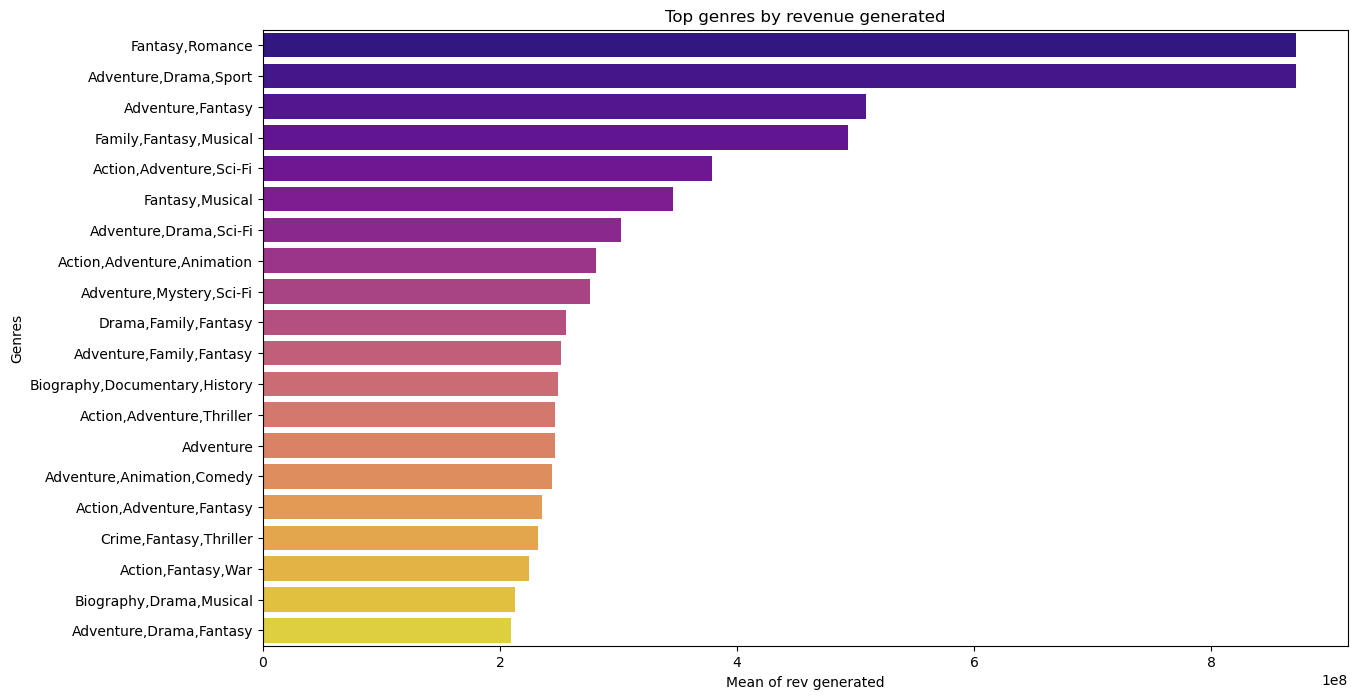

In [124]:
# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='mean', y='genres', data=top_genres_mean, palette='plasma')

# Add labels and title
plt.xlabel('Mean of rev generated')
plt.ylabel('Genres')
plt.title('Top genres by revenue generated')
plt.show()

In [125]:
avg_ratings = movie_df.groupby('genres')['averagerating'].agg(['count','mean', 'median'])

In [126]:
avg_ratings

,count,mean,median
genres,,,
Action,24,5.516667,5.45
"Action,Adventure",2,6.350000,6.35
"Action,Adventure,Animation",17,7.429412,7.60
"Action,Adventure,Biography",5,7.120000,7.00
"Action,Adventure,Comedy",30,6.310000,6.40
...,...,...,...
"Sci-Fi,Thriller",5,5.260000,5.90
Sport,1,7.900000,7.90
Thriller,43,5.376744,5.20


In [134]:
top_avg_ratings = avg_ratings.sort_values (by='mean',ascending=False).head(20)
top_avg_ratings

,count,mean,median
genres,,,
"Action,Documentary,Drama",1,8.700000,8.70
"Crime,Documentary",2,8.250000,8.25
"Crime,Documentary,History",1,8.200000,8.20
"Documentary,Drama,History",2,8.100000,8.10
"Documentary,Sport,Thriller",1,7.900000,7.90
Sport,1,7.900000,7.90
"Adventure,Drama,Mystery",1,7.900000,7.90
"Comedy,Musical",1,7.800000,7.80
"Adventure,Biography,Documentary",5,7.800000,7.60


In [139]:
top_avg_ratings = top_avg_ratings.reset_index() 

Text(0.5, 1.0, 'Top rated by genre')

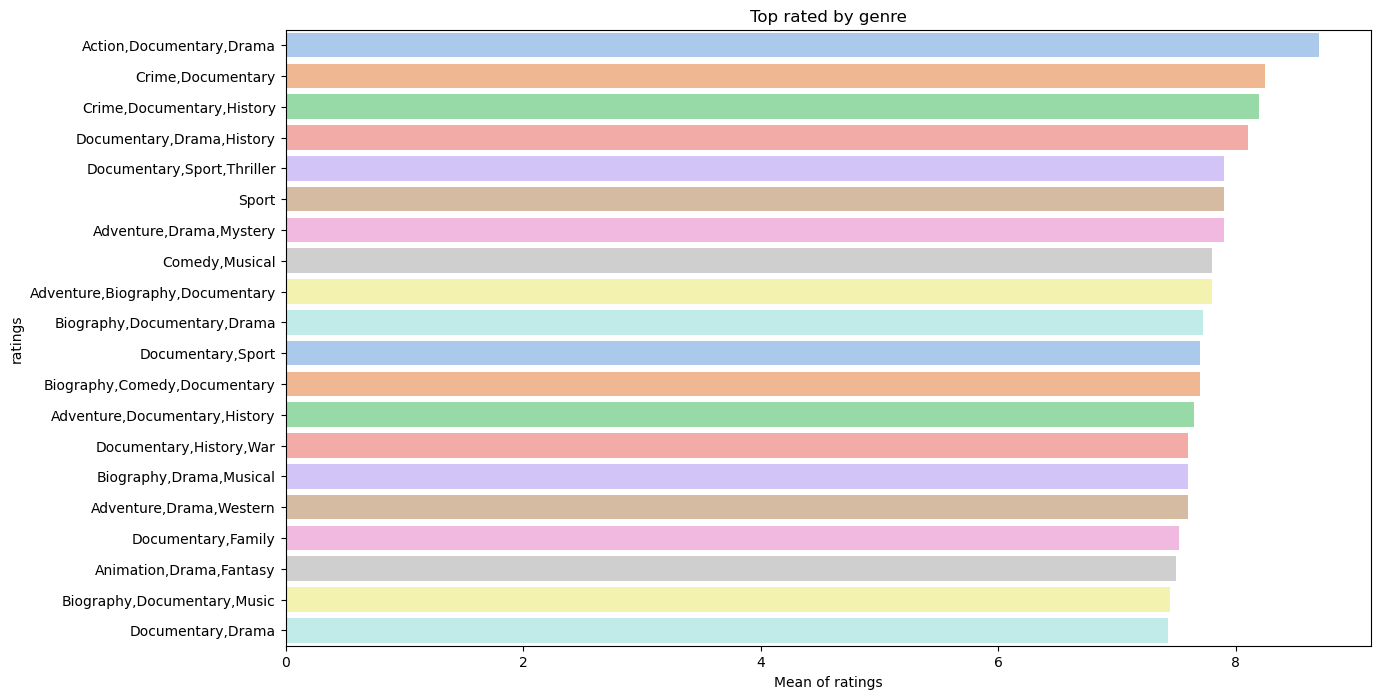

In [140]:
# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='mean', y='genres', data=top_avg_ratings, palette='pastel')

# Add labels and title
plt.xlabel('Mean of ratings')
plt.ylabel('ratings')
plt.title('Top rated by genre')

RECOMMENDATIONS

GENRES like fantasy,romance aventure and sports will likely to generate high revenue.
 
 Movies that will be highly rated mostly will include  action ,documentary ,drama, sports  and crime will have high ratings